In [6]:
import pandas as pd

df = pd.read_csv('full_summary.csv')

print(df.head())
print(df.info())

print(f"number of unique timestamp: {df['snapshot_date'].nunique()}")

   employee_id first_name last_name  gender pronouns  age  birth_date  \
0            1      Casey    Garcia  Female   he/him   35  30/10/1985   
1            2      Jamie     Jones    Male   he/him   34  30/10/1985   
2            3     Morgan   Johnson  Female  she/her   34   30/9/1986   
3            4    Cameron     Jones  Female  she/her   33   30/6/1986   
4            5      Riley   Johnson  Female   he/him   33  30/10/1986   

         department business_unit  job_level  ... current_salary  \
0  Customer Success    Commercial          1  ...          77073   
1             Sales    Commercial          1  ...          99836   
2             Sales    Commercial          1  ...          93771   
3       Engineering          Tech          3  ...         137932   
4       Engineering          Tech          2  ...         113656   

  engagement_score  risk_of_exit_score  vacation_leave  sick_leave  \
0        56.002838            0.373884               0           0   
1        56.

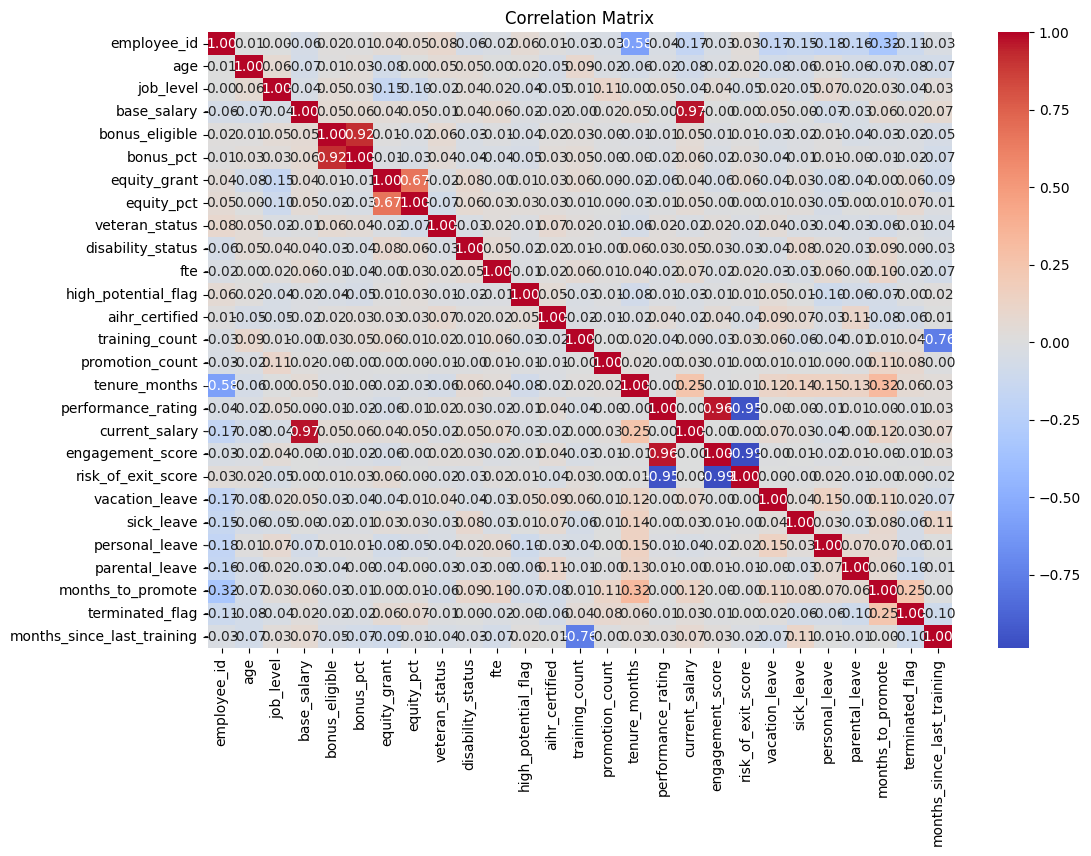

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [8]:
df['snapshot_date'] = pd.to_datetime(df['snapshot_date'])

df_sorted = df.sort_values(by=['employee_id', 'snapshot_date'], ascending=[True, False])

df_latest = df_sorted.drop_duplicates(subset=['employee_id'], keep='first')

print(f"\nNumber of rows after keeping only the latest snapshot for each employee: {len(df_latest)}")

df_working = df_latest.copy()

print(df_working.head())


Number of rows after keeping only the latest snapshot for each employee: 755
       employee_id first_name last_name  gender pronouns  age  birth_date  \
19092            1      Casey    Garcia  Female   he/him   35  30/10/1985   
19093            2      Jamie     Jones    Male   he/him   34  30/10/1985   
19094            3     Morgan   Johnson  Female  she/her   34   30/9/1986   
2757             4    Cameron     Jones  Female  she/her   33   30/6/1986   
8116             5      Riley   Johnson  Female   he/him   33  30/10/1986   

             department business_unit  job_level  ... current_salary  \
19092  Customer Success    Commercial          1  ...          86000   
19093             Sales    Commercial          1  ...         129557   
19094             Sales    Commercial          1  ...         110881   
2757        Engineering          Tech          3  ...         137174   
8116        Engineering          Tech          2  ...         119801   

      engagement_score  ri

C:\Users\amiru\AppData\Local\Temp\ipykernel_8928\3484586855.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['snapshot_date'] = pd.to_datetime(df['snapshot_date'])


In [9]:
if 'employment_status' in df_working.columns:
    df_working = df_working.drop(columns=['employment_status'])
    print("\n'employment_status' column dropped from df_working.")
else:
    print("\n'employment_status' column not found in df_working (already dropped or named differently).")

print(df_working.head()) 


'employment_status' column dropped from df_working.
       employee_id first_name last_name  gender pronouns  age  birth_date  \
19092            1      Casey    Garcia  Female   he/him   35  30/10/1985   
19093            2      Jamie     Jones    Male   he/him   34  30/10/1985   
19094            3     Morgan   Johnson  Female  she/her   34   30/9/1986   
2757             4    Cameron     Jones  Female  she/her   33   30/6/1986   
8116             5      Riley   Johnson  Female   he/him   33  30/10/1986   

             department business_unit  job_level  ... current_salary  \
19092  Customer Success    Commercial          1  ...          86000   
19093             Sales    Commercial          1  ...         129557   
19094             Sales    Commercial          1  ...         110881   
2757        Engineering          Tech          3  ...         137174   
8116        Engineering          Tech          2  ...         119801   

      engagement_score  risk_of_exit_score  vacatio

In [10]:
target = 'terminated_flag'

features_to_exclude_from_modeling = ['employee_id', 'snapshot_date', target]
final_features_for_modeling = [col for col in df_working.columns if col not in features_to_exclude_from_modeling]

print("\nFeatures selected for the model (excluding 'employment_status'):")
print(final_features_for_modeling)

numerical_features = df_working[final_features_for_modeling].select_dtypes(include=['number']).columns.tolist()
categorical_features = df_working[final_features_for_modeling].select_dtypes(include=['object']).columns.tolist()

print("\nNumerical Features:", numerical_features)
print("Categorical Features:", categorical_features)


Features selected for the model (excluding 'employment_status'):
['first_name', 'last_name', 'gender', 'pronouns', 'age', 'birth_date', 'department', 'business_unit', 'job_level', 'job_title', 'location', 'base_salary', 'bonus_eligible', 'bonus_pct', 'equity_grant', 'equity_pct', 'employment_type', 'hire_date', 'ethnicity', 'marital_status', 'education_level', 'pay_frequency', 'veteran_status', 'disability_status', 'cost_center', 'fte', 'exemption_status', 'high_potential_flag', 'succession_plan_status', 'aihr_certified', 'training_count', 'promotion_count', 'tenure_months', 'performance_rating', 'current_salary', 'engagement_score', 'risk_of_exit_score', 'vacation_leave', 'sick_leave', 'personal_leave', 'parental_leave', 'months_to_promote', 'months_since_last_training']

Numerical Features: ['age', 'job_level', 'base_salary', 'bonus_eligible', 'bonus_pct', 'equity_grant', 'equity_pct', 'veteran_status', 'disability_status', 'fte', 'high_potential_flag', 'aihr_certified', 'training_c

In [11]:
df_encoded = pd.get_dummies(df_working, columns=categorical_features, drop_first=True)

print("\nDataFrame after One-Hot Encoding:")
print(df_encoded.head())
print(f"Number of columns after encoding: {df_encoded.shape[1]}")

columns_to_exclude_from_X = ['employee_id', 'snapshot_date', target]

X = df_encoded.drop(columns=columns_to_exclude_from_X)
y = df_encoded[target]

print(f"\nShape of X (features): {X.shape}")
print(f"Shape of y (target): {y.shape}")


DataFrame after One-Hot Encoding:
       employee_id  age  job_level  base_salary  bonus_eligible  bonus_pct  \
19092            1   35          1        77073               0      0.000   
19093            2   34          1        95981               1      0.068   
19094            3   34          1        93771               0      0.000   
2757             4   33          3       132042               1      0.088   
8116             5   33          2       108535               0      0.000   

       equity_grant  equity_pct  veteran_status  disability_status  ...  \
19092             1      0.0993               0                  0  ...   
19093             1      0.0131               0                  0  ...   
19094             1      0.0279               0                  0  ...   
2757              1      0.0740               0                  0  ...   
8116              0      0.0000               0                  0  ...   

       cost_center_CC1012  cost_center_CC1013

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

print("\nProportion of 'terminated_flag' in y_train:")
print(y_train.value_counts(normalize=True))
print("\nProportion of 'terminated_flag' in y_test:")
print(y_test.value_counts(normalize=True))


Shape of X_train: (604, 540)
Shape of X_test: (151, 540)
Shape of y_train: (604,)
Shape of y_test: (151,)

Proportion of 'terminated_flag' in y_train:
terminated_flag
0    0.950331
1    0.049669
Name: proportion, dtype: float64

Proportion of 'terminated_flag' in y_test:
terminated_flag
0    0.953642
1    0.046358
Name: proportion, dtype: float64


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, confusion_matrix

model = LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1] 
print("\n--- Logistic Regression Model Performance ---")
print("Classification Report:\n", classification_report(y_test, y_pred))

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"\nPrecision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)



--- Logistic Regression Model Performance ---
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       144
           1       0.20      0.29      0.24         7

    accuracy                           0.91       151
   macro avg       0.58      0.62      0.59       151
weighted avg       0.93      0.91      0.92       151


Precision: 0.2000
Recall: 0.2857
F1-Score: 0.2353

Confusion Matrix:
 [[136   8]
 [  5   2]]


In [14]:
coefficients = model.coef_[0]

feature_names = X.columns

coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

coeff_df['Abs_Coefficient'] = abs(coeff_df['Coefficient'])
coeff_df = coeff_df.sort_values(by='Abs_Coefficient', ascending=False)

print("\n--- Logistic Regression Feature Coefficients (Top 10) ---")
print(coeff_df.head(10))


--- Logistic Regression Feature Coefficients (Top 10) ---
                       Feature  Coefficient  Abs_Coefficient
532         cost_center_CC1014     2.054997         2.054997
523         cost_center_CC1005     1.847501         1.847501
47             pronouns_ze/zir     1.825773         1.825773
519         cost_center_CC1001    -1.447744         1.447744
457        hire_date_30/4/2020     1.411273         1.411273
463        hire_date_30/5/2020     1.402940         1.402940
436  employment_type_Full-time     1.357620         1.357620
513      marital_status_Single    -1.330877         1.330877
471        hire_date_30/7/2020     1.320864         1.320864
518        education_level_PhD     1.197986         1.197986


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, confusion_matrix

model_rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

print("\n--- Random Forest Model Performance ---")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(f"\nPrecision (RF): {precision_rf:.4f}")
print(f"Recall (RF): {recall_rf:.4f}")
print(f"F1-Score (RF): {f1_rf:.4f}")
print("\nConfusion Matrix (RF):\n", conf_matrix_rf)

importances = model_rf.feature_importances_
rf_feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
rf_feature_importances = rf_feature_importances.sort_values(by='Importance', ascending=False)

print("\n--- Random Forest Feature Importances (Top 10) ---")
print(rf_feature_importances.head(10))


--- Random Forest Model Performance ---
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       144
           1       0.00      0.00      0.00         7

    accuracy                           0.95       151
   macro avg       0.48      0.50      0.49       151
weighted avg       0.91      0.95      0.93       151


Precision (RF): 0.0000
Recall (RF): 0.0000
F1-Score (RF): 0.0000

Confusion Matrix (RF):
 [[144   0]
 [  7   0]]

--- Random Forest Feature Importances (Top 10) ---
                       Feature  Importance
23           months_to_promote    0.155409
14               tenure_months    0.068910
15          performance_rating    0.040335
24  months_since_last_training    0.034733
17            engagement_score    0.032400
0                          age    0.031232
18          risk_of_exit_score    0.031080
16              current_salary    0.027013
2                  base_salary    0.025429
6           

c:\Users\amiru\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\amiru\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\amiru\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [16]:
from imblearn.over_sampling import SMOTE
from collections import Counter # To show the counts after balancing

# --- Apply SMOTE only to the training data ---
# It's crucial NOT to apply SMOTE to your test data, as that would leak information.

print(f"\nOriginal training set shape (y_train): {Counter(y_train)}")

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Resampled training set shape (y_train_resampled): {Counter(y_train_resampled)}")

# Now, X_train_resampled and y_train_resampled are your balanced training sets.
# You will use these for training your models from now on.


Original training set shape (y_train): Counter({0: 574, 1: 30})
Resampled training set shape (y_train_resampled): Counter({0: 574, 1: 574})


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, confusion_matrix

model_lr_resampled = LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced') # class_weight='balanced' can still be useful, but SMOTE is primary

model_lr_resampled.fit(X_train_resampled, y_train_resampled) # Use the resampled data

y_pred_lr_resampled = model_lr_resampled.predict(X_test) # Predict on the original, un-resampled test set
y_prob_lr_resampled = model_lr_resampled.predict_proba(X_test)[:, 1]

print("\n--- Logistic Regression Model Performance (After SMOTE) ---")
print("Classification Report:\n", classification_report(y_test, y_pred_lr_resampled))

precision_lr_resampled = precision_score(y_test, y_pred_lr_resampled)
recall_lr_resampled = recall_score(y_test, y_pred_lr_resampled)
f1_lr_resampled = f1_score(y_test, y_pred_lr_resampled)
conf_matrix_lr_resampled = confusion_matrix(y_test, y_pred_lr_resampled)

print(f"\nPrecision: {precision_lr_resampled:.4f}")
print(f"Recall: {recall_lr_resampled:.4f}")
print(f"F1-Score: {f1_lr_resampled:.4f}")
print("\nConfusion Matrix:\n", conf_matrix_lr_resampled)



coefficients_resampled = model_lr_resampled.coef_[0]
feature_names_resampled = X.columns 
coeff_df_resampled = pd.DataFrame({'Feature': feature_names_resampled, 'Coefficient': coefficients_resampled})
coeff_df_resampled['Abs_Coefficient'] = abs(coeff_df_resampled['Coefficient'])
coeff_df_resampled = coeff_df_resampled.sort_values(by='Abs_Coefficient', ascending=False)

print("\n--- Logistic Regression Feature Coefficients (Top 10 - After SMOTE) ---")
print(coeff_df_resampled.head(10))


--- Logistic Regression Model Performance (After SMOTE) ---
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       144
           1       0.50      0.14      0.22         7

    accuracy                           0.95       151
   macro avg       0.73      0.57      0.60       151
weighted avg       0.94      0.95      0.94       151


Precision: 0.5000
Recall: 0.1429
F1-Score: 0.2222

Confusion Matrix:
 [[143   1]
 [  6   1]]

--- Logistic Regression Feature Coefficients (Top 10 - After SMOTE) ---
                         Feature  Coefficient  Abs_Coefficient
532           cost_center_CC1014     0.956959         0.956959
523           cost_center_CC1005     0.848233         0.848233
431                 job_title_VP     0.758816         0.758816
509           ethnicity_Hispanic     0.755101         0.755101
20                    sick_leave    -0.730294         0.730294
516  education_level_High School     0.7080

In [18]:
from sklearn.ensemble import RandomForestClassifier

model_rf_resampled = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced') # class_weight still useful here too

model_rf_resampled.fit(X_train_resampled, y_train_resampled) # Use the resampled data

y_pred_rf_resampled = model_rf_resampled.predict(X_test) # Predict on the original, un-resampled test set

print("\n--- Random Forest Model Performance (After SMOTE) ---")
print("Classification Report:\n", classification_report(y_test, y_pred_rf_resampled))

precision_rf_resampled = precision_score(y_test, y_pred_rf_resampled)
recall_rf_resampled = recall_score(y_test, y_pred_rf_resampled)
f1_rf_resampled = f1_score(y_test, y_pred_rf_resampled)
conf_matrix_rf_resampled = confusion_matrix(y_test, y_pred_rf_resampled)

print(f"\nPrecision (RF): {precision_rf_resampled:.4f}")
print(f"Recall (RF): {recall_rf_resampled:.4f}")
print(f"F1-Score (RF): {f1_rf_resampled:.4f}")
print("\nConfusion Matrix (RF):\n", conf_matrix_rf_resampled)


importances_resampled = model_rf_resampled.feature_importances_
rf_feature_importances_resampled = pd.DataFrame({'Feature': X.columns, 'Importance': importances_resampled})
rf_feature_importances_resampled = rf_feature_importances_resampled.sort_values(by='Importance', ascending=False)

print("\n--- Random Forest Feature Importances (Top 10 - After SMOTE) ---")
print(rf_feature_importances_resampled.head(10))


--- Random Forest Model Performance (After SMOTE) ---
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       144
           1       0.00      0.00      0.00         7

    accuracy                           0.95       151
   macro avg       0.48      0.50      0.49       151
weighted avg       0.91      0.95      0.93       151


Precision (RF): 0.0000
Recall (RF): 0.0000
F1-Score (RF): 0.0000

Confusion Matrix (RF):
 [[144   0]
 [  7   0]]

--- Random Forest Feature Importances (Top 10 - After SMOTE) ---
                        Feature  Importance
23            months_to_promote    0.167214
14                tenure_months    0.056446
523          cost_center_CC1005    0.032140
24   months_since_last_training    0.029806
532          cost_center_CC1014    0.029334
9                           fte    0.026374
4                     bonus_pct    0.021605
47              pronouns_ze/zir    0.018644
436   employment_t

c:\Users\amiru\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\amiru\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\amiru\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [19]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from collections import Counter

neg_count_resampled = Counter(y_train_resampled)[0]
pos_count_resampled = Counter(y_train_resampled)[1]
scale_pos_weight_value = neg_count_resampled / pos_count_resampled

print(f"Calculated scale_pos_weight: {scale_pos_weight_value:.2f}")

# Initialize and train XGBoost Classifier with scale_pos_weight
model_xgb = XGBClassifier(
    objective='binary:logistic', # For binary classification
    eval_metric='logloss',       # Common evaluation metric
    use_label_encoder=False,     # Suppress warning for older versions
    n_estimators=100,            # Number of boosting rounds (trees)
    random_state=42,
    scale_pos_weight=scale_pos_weight_value # Apply the calculated weight
)


model_xgb.fit(X_train_resampled, y_train_resampled)


y_pred_xgb = model_xgb.predict(X_test)
y_prob_xgb = model_xgb.predict_proba(X_test)[:, 1] 

print("\n--- XGBoost Model Performance (After SMOTE & scale_pos_weight) ---")
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


xgb_feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model_xgb.feature_importances_})
xgb_feature_importances = xgb_feature_importances.sort_values(by='Importance', ascending=False)
print("\n--- XGBoost Feature Importances (Top 10) ---")
print(xgb_feature_importances.head(10))

Calculated scale_pos_weight: 1.00


c:\Users\amiru\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning: [20:01:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



--- XGBoost Model Performance (After SMOTE & scale_pos_weight) ---
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       144
           1       0.50      0.29      0.36         7

    accuracy                           0.95       151
   macro avg       0.73      0.64      0.67       151
weighted avg       0.94      0.95      0.95       151


Confusion Matrix:
 [[142   2]
 [  5   2]]

--- XGBoost Feature Importances (Top 10) ---
                         Feature  Importance
23             months_to_promote    0.203037
5                   equity_grant    0.081247
436    employment_type_Full-time    0.074394
516  education_level_High School    0.056954
1                      job_level    0.052963
22                parental_leave    0.046881
3                 bonus_eligible    0.043329
470          hire_date_30/7/2019    0.038419
47               pronouns_ze/zir    0.027845
189         birth_date_30/5/1978    0.0256

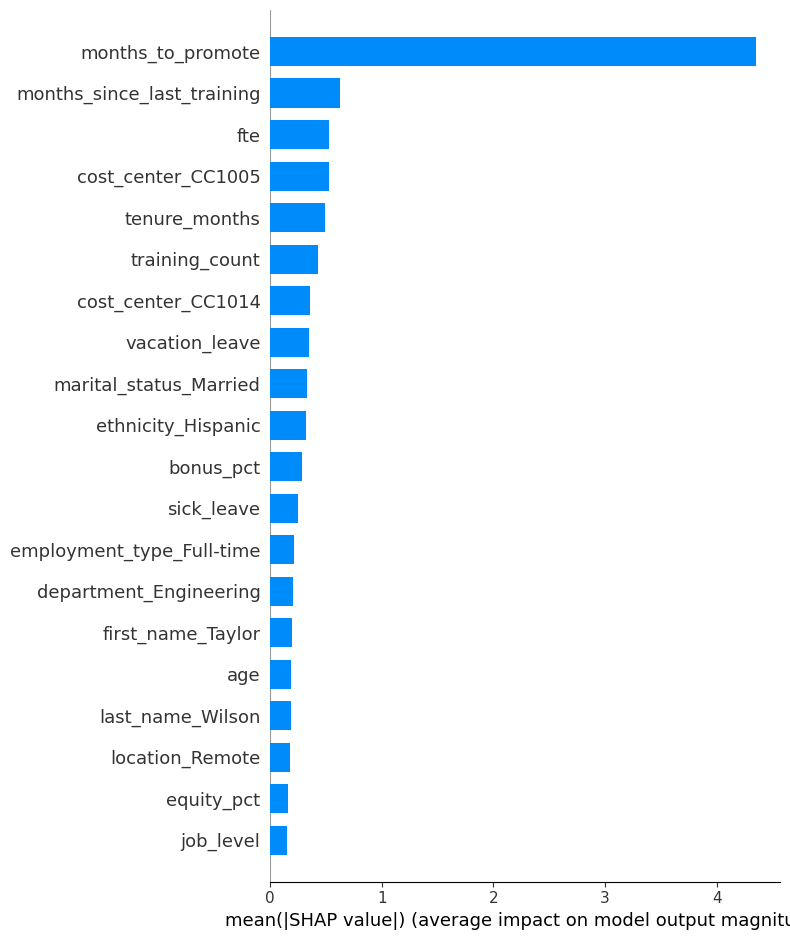

In [20]:
import shap

# Use your trained model and final feature set
explainer = shap.TreeExplainer(model_xgb)  # model = your trained RF or XGBoost
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [21]:
import pandas as pd


test_employee_ids = df_working.loc[X_test.index, 'employee_id']


predictions_for_tableau = pd.DataFrame({
    'Employee ID': test_employee_ids,
    'Actual_Attrition': y_test,
    'Predicted_Attrition': y_pred_xgb,
    'Probability_Attrition': y_prob_xgb
})


predictions_for_tableau = predictions_for_tableau.reset_index(drop=True)



final_tableau_df = df_working.merge(
    predictions_for_tableau,
    left_on='employee_id',
    right_on='Employee ID',
    how='left'
)


if 'Employee ID' in final_tableau_df.columns and 'employee_id' in final_tableau_df.columns:
    final_tableau_df = final_tableau_df.drop(columns=['Employee ID']) # This drops the column that came from predictions_for_tableau
    final_tableau_df = final_tableau_df.rename(columns={'employee_id': 'Employee ID'}) # This renames the original column

output_filename = 'employee_attrition_dashboard_main_data.csv'
final_tableau_df.to_csv(output_filename, index=False)

print(f"Successfully created '{output_filename}' for Tableau!")
print("\nFirst 5 rows of the new Tableau file (check for new prediction columns at the end):")
print(final_tableau_df.head())
print(f"\nColumns in the new Tableau file: {final_tableau_df.columns.tolist()}")

Successfully created 'employee_attrition_dashboard_main_data.csv' for Tableau!

First 5 rows of the new Tableau file (check for new prediction columns at the end):
   Employee ID first_name last_name  gender pronouns  age  birth_date  \
0            1      Casey    Garcia  Female   he/him   35  30/10/1985   
1            2      Jamie     Jones    Male   he/him   34  30/10/1985   
2            3     Morgan   Johnson  Female  she/her   34   30/9/1986   
3            4    Cameron     Jones  Female  she/her   33   30/6/1986   
4            5      Riley   Johnson  Female   he/him   33  30/10/1986   

         department business_unit  job_level  ... vacation_leave sick_leave  \
0  Customer Success    Commercial          1  ...              0          0   
1             Sales    Commercial          1  ...              3          1   
2             Sales    Commercial          1  ...              0          0   
3       Engineering          Tech          3  ...              0          0   
4 

In [22]:
# Export XGBoost Feature Importances
output_path_xgb_importances = 'xgb_feature_importances_for_tableau.csv'
xgb_feature_importances.to_csv(output_path_xgb_importances, index=False)
print(f"\nExported XGBoost feature importances to: {output_path_xgb_importances}")
print(xgb_feature_importances.head())

# Export Logistic Regression Coefficients
output_path_lr_coeffs = 'lr_coefficients_for_tableau.csv'
coeff_df_resampled.to_csv(output_path_lr_coeffs, index=False)
print(f"\nExported Logistic Regression coefficients to: {output_path_lr_coeffs}")
print(coeff_df_resampled.head())

# Export Random Forest Coefficients
output_path_rf_importances = 'rf_feature_importances_for_tableau.csv'
rf_feature_importances_resampled.to_csv(output_path_rf_importances, index=False)
print(f"\nExported Random Forest feature importances to: {output_path_rf_importances}")
print(rf_feature_importances_resampled.head())


Exported XGBoost feature importances to: xgb_feature_importances_for_tableau.csv
                         Feature  Importance
23             months_to_promote    0.203037
5                   equity_grant    0.081247
436    employment_type_Full-time    0.074394
516  education_level_High School    0.056954
1                      job_level    0.052963

Exported Logistic Regression coefficients to: lr_coefficients_for_tableau.csv
                Feature  Coefficient  Abs_Coefficient
532  cost_center_CC1014     0.956959         0.956959
523  cost_center_CC1005     0.848233         0.848233
431        job_title_VP     0.758816         0.758816
509  ethnicity_Hispanic     0.755101         0.755101
20           sick_leave    -0.730294         0.730294

Exported Random Forest feature importances to: rf_feature_importances_for_tableau.csv
                        Feature  Importance
23            months_to_promote    0.167214
14                tenure_months    0.056446
523          cost_center_C